# Classification of Dog and Cat using ResNet CNN model

In [26]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [27]:
#Importing Deep Learning Libraries
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *

In [28]:
train_path = 'dataset/training_set'
test_path = 'dataset/test_set'

In [29]:
train_batch = ImageDataGenerator().flow_from_directory(train_path,target_size=(64,64),classes=['dogs','cats'],batch_size=5)
test_batch = ImageDataGenerator().flow_from_directory(test_path,target_size=(64,64),classes=['dogs','cats'],batch_size=5)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [30]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [31]:
imgs,labels = next(train_batch)

C:\Users\Suyog\.conda\envs\deep_learning\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


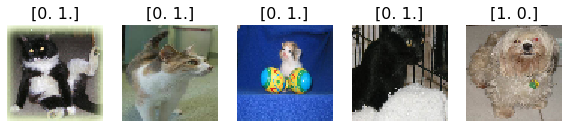

In [32]:
plots(imgs,titles=labels)

## Build Simple CNN

In [33]:
model = Sequential()

In [34]:
#First CNN
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=train_batch.image_shape))

In [35]:
model.add(Flatten())

In [36]:
model.add(Dense(units=2,activation='softmax'))

In [37]:
model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
model.fit_generator(train_batch,steps_per_epoch=4,validation_data=test_batch,validation_steps=4,epochs=5)

Epoch 1/5
4/4 [==============================] - 1s 248ms/step - loss: 167.8461 - accuracy: 0.3500 - val_loss: 126.1684 - val_accuracy: 0.3500
Epoch 2/5
4/4 [==============================] - 0s 120ms/step - loss: 118.4393 - accuracy: 0.4000 - val_loss: 161.0479 - val_accuracy: 0.5500
Epoch 3/5
4/4 [==============================] - 0s 117ms/step - loss: 114.1811 - accuracy: 0.4000 - val_loss: 44.8710 - val_accuracy: 0.5500
Epoch 4/5
4/4 [==============================] - 1s 132ms/step - loss: 44.7493 - accuracy: 0.4000 - val_loss: 17.4604 - val_accuracy: 0.4500
Epoch 5/5
4/4 [==============================] - 1s 150ms/step - loss: 11.8303 - accuracy: 0.6000 - val_loss: 17.4654 - val_accuracy: 0.6000


## Prediction from our Simple CNN

In [40]:
test_imgs,test_labels = next(test_batch)

In [41]:
test_labels =test_labels[:,0]

In [42]:
test_labels

array([0., 1., 1., 0., 0.], dtype=float32)

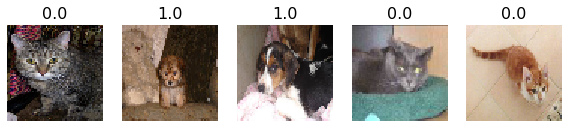

In [43]:
plots(test_imgs,titles=test_labels)

In [44]:
predictions = model.predict_generator(test_batch,steps=1)

In [45]:
import pandas as pd
pred = pd.DataFrame(predictions[:,0])

In [46]:
pred

,0
0,1.277244e-23
1,9.376940e-01
2,9.997985e-01
3,8.777524e-01
4,3.600208e-02


In [47]:
pred1 = np.where(pred > 0.5, 1,0)

In [48]:
pred1

array([[0],
       [1],
       [1],
       [1],
       [0]])

In [49]:
cm = confusion_matrix(test_labels,pred1)

In [50]:
cm

array([[2, 1],
       [0, 2]], dtype=int64)

## Build Fine Tuned VGG16 model

In [ ]:
vgg16_model = keras.applications.vgg16.VGG16()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 64373286793e3c8b2b4e3219cbf3544b so we will re-download the data.
  5038080/553467096 [..............................] - ETA: 4:11:49

In [61]:
vgg16_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [62]:
type(vgg16_model)

keras.engine.training.Model

In [63]:
model = Sequential()

In [64]:
for layer in vgg16_model.layers:
    model.add(layer)

ValueError: Input 0 is incompatible with layer conv2d_7: expected axis -1 of input shape to have value 64 but got shape (None, 147, 147, 128)

In [ ]:
model.summary()

In [ ]:
model.layers.pop()

In [ ]:
model.summary()

In [ ]:
for layer in model.layers:
    layer.trainable=False

In [ ]:
model.add(Dense(2,activation='softmax'))

In [ ]:
model.summary()

## Train the fine-tuned VGG16 model

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit_generator(train_batch,steps_per_epoch=4,validation_data=test_batch,validation_steps=4,epochs=5)

## Prediction from VGG16 Model

In [ ]:
test_imgs,test_labels = next(test_batch)

In [ ]:
test_labels =test_labels[:,0]

In [ ]:
plots(test_imgs,titles=test_labels)

In [ ]:
predictions = model.predict_generator(test_batch,steps=1)

In [ ]:
import pandas as pd
pred = pd.DataFrame(predictions[:,0])

In [ ]:
pred

In [ ]:
pred1 = np.where(pred > 0.5, 1,0)

In [ ]:
pred1

In [ ]:
cm = confusion_matrix(test_labels,pred1)